In [1]:
import json
import pandas as pd
import re

In [2]:
data = []

with open('disease and symptoms.csv', 'r', encoding='utf-16-le') as file:
    headers = file.readline().strip().split(',')[:2]  # Only the first 2 headers
    
    pattern = re.compile(r'(\d+),([^,]+),(\[.*?\])')
    
    for line in file:
        match = pattern.match(line)
        if match:
            code, name, symptoms_str = match.groups()
            
            # Convert the 'symptoms' field from JSON string to actual list of dictionaries
            try:
                symptoms = json.loads(symptoms_str)
            except json.JSONDecodeError:
                print(f"Error decoding JSON for line: {line[:100]}...")
                continue

            data_dict = {headers[0]: code, headers[1]: name, 'symptoms_set': symptoms}
            data.append(data_dict)

df = pd.DataFrame(data)

In [3]:
print(df.name.nunique())
df.head()

796


,﻿Code,name,symptoms_set
0,105,Panic disorder,"[{'symptoms': 'Anxiety and nervousness'}, {'sy..."
1,106,Vocal cord polyp,"[{'symptoms': 'Hoarse voice'}, {'symptoms': '9..."
2,107,Turner syndrome,"[{'symptoms': 'Groin mass'}, {'symptoms': '27'..."
3,108,Cryptorchidism,[{'symptoms': 'Symptoms of the scrotum and tes...
4,109,Poisoning due to ethylene glycol,"[{'symptoms': 'Abusing alcohol'}, {'symptoms':..."


In [4]:
df['symptoms'] = df['symptoms_set'].apply(
    lambda x: [item['symptoms'] for item in x if not item['symptoms'].isdigit()]
)

In [5]:
df.head()

,﻿Code,name,symptoms_set,symptoms
0,105,Panic disorder,"[{'symptoms': 'Anxiety and nervousness'}, {'sy...","[Anxiety and nervousness, Depression, Shortnes..."
1,106,Vocal cord polyp,"[{'symptoms': 'Hoarse voice'}, {'symptoms': '9...","[Hoarse voice, Sore throat, Difficulty speakin..."
2,107,Turner syndrome,"[{'symptoms': 'Groin mass'}, {'symptoms': '27'...","[Groin mass, Leg pain, Hip pain, Suprapubic pa..."
3,108,Cryptorchidism,[{'symptoms': 'Symptoms of the scrotum and tes...,"[Symptoms of the scrotum and testes, Swelling ..."
4,109,Poisoning due to ethylene glycol,"[{'symptoms': 'Abusing alcohol'}, {'symptoms':...","[Abusing alcohol, Fainting, Hostile behavior, ..."


In [6]:
unique_symptoms = set()

for symptoms_list in df['symptoms']:
    unique_symptoms.update(symptoms_list)

In [7]:
len(unique_symptoms)

376

In [8]:
[i for i in list(unique_symptoms) if i in df.name.unique()]

['Diaper rash', 'Drug abuse', 'Depression', 'Lymphedema']

In [9]:
list(df[df['name'] == 'Diaper rash']['symptoms'])

[['Diaper rash',
  'Skin rash',
  'Diarrhea',
  'Fever',
  'Cough',
  'Nasal congestion',
  'Vomiting',
  'Blood in stool',
  'Irritable infant',
  'Pulling at ears',
  'Redness in ear',
  'Temper problems']]

In [10]:
list(df[df['name'] == 'Lymphedema']['symptoms'])

[['Skin lesion',
  'Leg swelling',
  'Peripheral edema',
  'Leg pain',
  'Abnormal appearing skin',
  'Fluid retention',
  'Skin on leg or foot looks infected',
  'Lymphedema',
  'Foot or toe swelling',
  'Skin dryness, peeling, scaliness, or roughness',
  'Neck mass',
  'Throat swelling']]

In [11]:
list(df[df['name'] == 'Drug abuse']['symptoms'])

[['Drug abuse',
  'Depressive or psychotic symptoms',
  'Depression',
  'Abusing alcohol',
  'Anxiety and nervousness',
  'Delusions or hallucinations',
  'Antisocial behavior',
  'Sweating',
  'Hostile behavior',
  'Excessive anger',
  'Fears and phobias',
  'Smoking problems']]

In [12]:
list(df[df['name'] == 'Depression']['symptoms'])

[['Depression',
  'Depressive or psychotic symptoms',
  'Anxiety and nervousness',
  'Insomnia',
  'Abusing alcohol',
  'Drug abuse',
  'Delusions or hallucinations',
  'Excessive anger',
  'Disturbance of memory',
  'Low self-esteem',
  'Hostile behavior',
  'Temper problems']]

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
for disease in df['name']:
    G.add_node(disease)

# Iterate over each pair of diseases
for i in range(len(df)):
    for j in range(i+1, len(df)):
        disease1 = df.iloc[i]['name']
        disease2 = df.iloc[j]['name']
        
        # Compute the intersection of their symptoms
        shared_symptoms = set(df.iloc[i]['symptoms']).intersection(set(df.iloc[j]['symptoms']))
        
        # If they have shared symptoms, add a weighted edge
        if shared_symptoms:
            G.add_edge(disease1, disease2, weight=len(shared_symptoms))

# Now G contains the unipartite graph of diseases linked by shared symptoms.

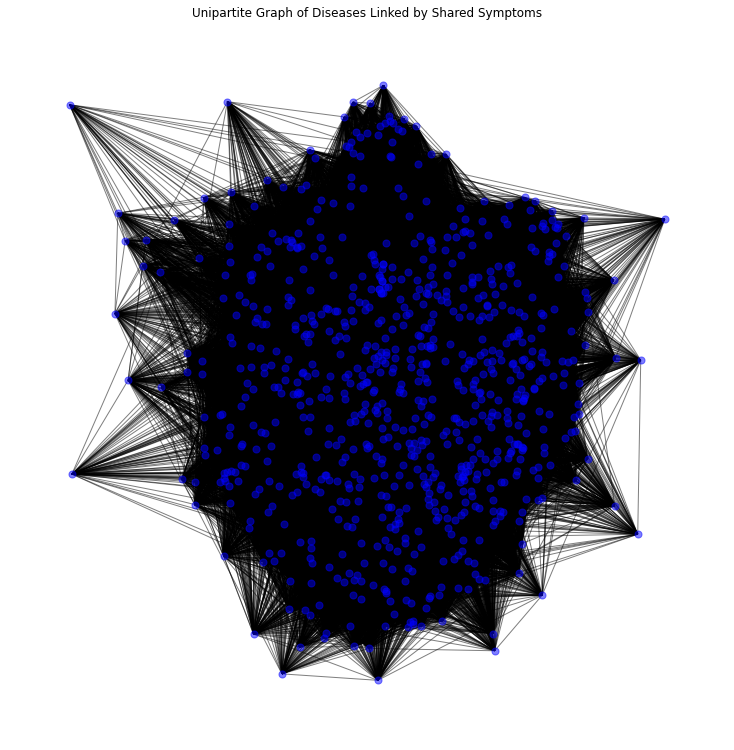

In [15]:
# Use Spring layout for positioning
pos = nx.spring_layout(G, seed=34)

# Draw the graph
plt.figure(figsize=(10,10))
nx.draw(G, pos, with_labels=False, node_color='blue', node_size=50, alpha=0.5, edge_color="black")
plt.title("Unipartite Graph of Diseases Linked by Shared Symptoms")
plt.show()